In [1]:
%pylab inline
from champ.sim import multiXC, multiXCGVP
from scipy.optimize import root_scalar

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [1]:
n = 10
x_arr = linspace(0,100,n)
z_arr = linspace(0,1,n)
sim = multiXC(x_arr,z_arr,0.1, init_radii=2.0)

NameError: name 'linspace' is not defined

In [28]:
h0 = sim.z_arr[0] + 0.5
hguess = h0+0.1
g=9.8
f=0.1
L = sim.x_arr[1] - sim.x_arr[0]
fd_down = h0 - sim.z_arr[0]
fd_guess = 0.40084796343254675# WSnew #hguess - sim.z_arr[1]
xc_up = sim.xcs[1]
xc_down = sim.xcs[0]



A_guess = xc_up.calcA(depth=fd_guess)
Pw_guess = xc_up.calcP(depth=fd_guess)
K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
S_f_guess = sim.Q_w**2 / K_guess
h_e_guess = S_f_guess * L


A_down = xc_down.calcA(depth=fd_down)
Pw_down = xc_down.calcP(depth=fd_down)


V_down = sim.Q_w/A_down
V_up_guess = sim.Q_w/A_guess

V_head_down = V_down**2/(2*g)
V_head_up_guess = V_up_guess**2/(2*g)

fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
fd_calc_from_guess

0.40084796343254675

In [20]:
WSnew = fd_guess + 0.7 * (fd_calc_from_guess - fd_guess)
WSnew

0.4248353727310991

-1.399990209518333

In [31]:
def fd_res(fd_guess):
    A_guess = xc_up.calcA(depth=fd_guess)
    Pw_guess = xc_up.calcP(depth=fd_guess)
    K_guess = A_guess * np.sqrt(2*g*(4*A_guess/Pw_guess)/f)
    # S_f_guess = sim.Q_w**2 / K_guess


    A_down = xc_down.calcA(depth=fd_down)
    Pw_down = xc_down.calcP(depth=fd_down)
    K_down = A_down * np.sqrt(2*g*(4*A_down/Pw_down)/f)

    S_f_guess = (2 * sim.Q_w / (K_down + K_guess) )**2
    h_e_guess = S_f_guess * L

    V_down = sim.Q_w/A_down
    V_up_guess = sim.Q_w/A_guess

    V_head_down = V_down**2/(2*g)
    V_head_up_guess = V_up_guess**2/(2*g)

    fd_calc_from_guess = sim.z_arr[0] - sim.z_arr[1] + fd_down + V_head_down - V_head_up_guess + h_e_guess
    return fd_guess - fd_calc_from_guess

In [34]:
sol = root_scalar(fd_res, x0=0.4, x1=0.45)

In [35]:
sol.root

0.3890728672941937

In [39]:
n = 100
x_arr = linspace(0,1000,n)
z_arr = linspace(0,1,n)
sim = multiXCGVP(x_arr,z_arr,0.1, init_radii=5.0)

In [30]:
sim.run_one_step()

/home/mcoving/anaconda3/lib/python3.9/site-packages/champ-0.2-py3.9-linux-x86_64.egg/champ/crossSection.py:366: RuntimeWarning: divide by zero encountered in double_scalars
  self.psi = g * self.eSlope / sum
/home/mcoving/anaconda3/lib/python3.9/site-packages/champ-0.2-py3.9-linux-x86_64.egg/champ/crossSection.py:341: RuntimeWarning: invalid value encountered in multiply
  self.T_b = psi * rho_w * Awet * vgrad2


In [40]:
sim.calc_flow()

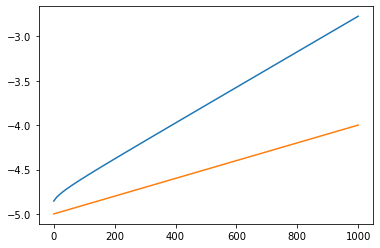

In [41]:
plot(sim.x_arr, sim.h)
plot(sim.x_arr, sim.z_arr)

In [42]:
for xc in sim.xcs:
    print(xc.eSlope)

0.0018699285063254602
0.0009932855530891736
0.0006936239361032359
0.0004921570173169648
0.0003855953714770291
0.0003022318835499295
0.00024027541155222058
0.00020652278862839327
0.0001780361184516442
0.00015391574291585044
0.00012401904925864944
0.00010106172903315938
9.450766682647748e-05
8.828403086421781e-05
7.730608718706637e-05
6.78496315213619e-05
5.96831005640334e-05
5.261320026792745e-05
4.647809887940191e-05
4.114191368146172e-05
3.649023030114764e-05
3.44121514420061e-05
3.242644913952166e-05
2.886879668373466e-05
2.5747873102547224e-05
2.3004633826541364e-05
2.1770784584714814e-05
2.0588723452077535e-05
1.8457096562099452e-05
1.749534858382355e-05
1.6572872903843483e-05
1.4904384552581627e-05
1.3424380798680229e-05
1.2753713881199927e-05
1.2109362968491696e-05
1.0939026573933136e-05
1.0407240977842334e-05
9.895792350456674e-06
8.964411098982846e-06
8.540107961351298e-06
8.131629959268195e-06
7.385909939900439e-06
7.045350477938368e-06
6.717186316069426e-06
6.1166649615066965